In [1]:
#load data set
import pandas as pd

In [2]:
file_path=r'C:\Users\ujjwa\Downloads\glass.xlsx'

In [3]:
file_path

'C:\\Users\\ujjwa\\Downloads\\glass.xlsx'

In [4]:
df=pd.read_excel(file_path)

In [5]:
df

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium
9,Fe: Iron


In [6]:
# Overview of the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 1 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Prepare a model for glass classification using Random Forest  18 non-null     object
dtypes: object(1)
memory usage: 284.0+ bytes
None
       Prepare a model for glass classification using Random Forest
count                                                  18          
unique                                                 18          
top                                     Data Description:          
freq                                                    1          


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print(f'Missing Values:\n{missing_values}')

Missing Values:
Prepare a model for glass classification using Random Forest    1
dtype: int64


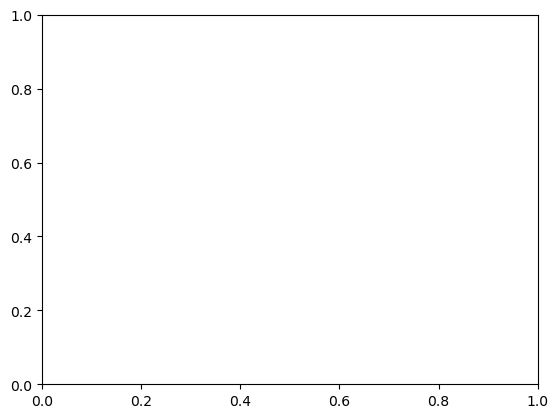

In [8]:
# Check for outliers using boxplots
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df)
plt.show()

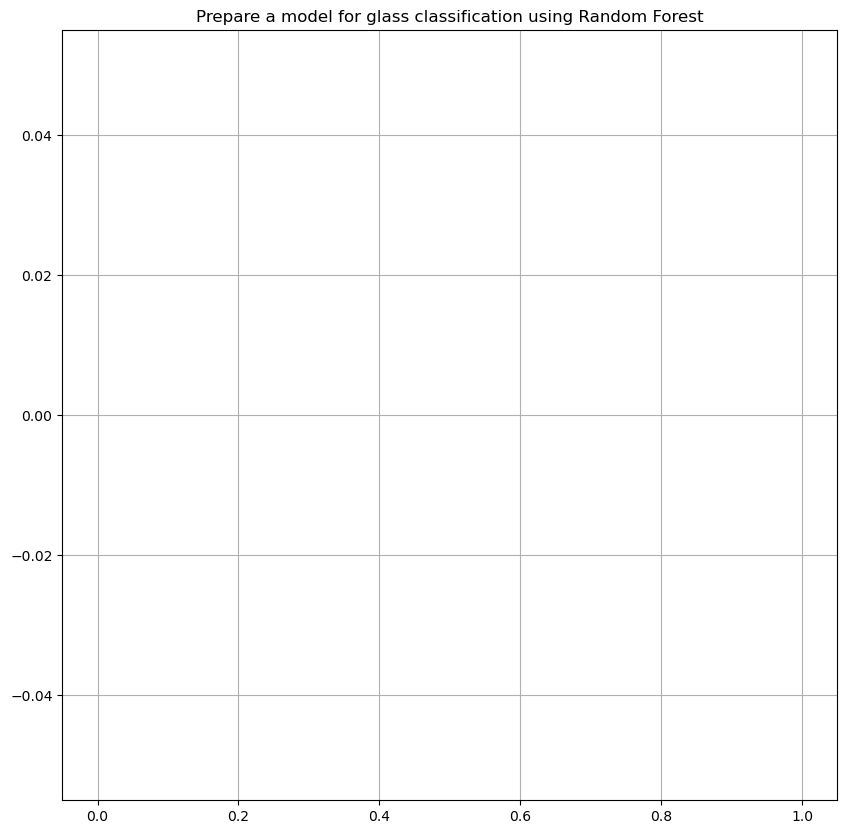

In [9]:
#2. Data Visualization
# Histograms for all features
# Histograms for all features
# Ensure the dataframe contains numerical columns
df = df.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric, set errors as NaN

# Drop rows with missing values if necessary
df = df.dropna()

# Select only numerical columns for plotting
df.select_dtypes(include=['number']).hist(bins=10, figsize=(10, 10))

# Display the histogram
plt.show()

In [10]:
#3. Data Preprocessing
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
import pandas as pd
from sklearn.impute import SimpleImputer

# Sample data with missing values
data = pd.DataFrame({
    'A': [1, 2, None, 4],
    'B': [None, 2, 3, 4],
    'C': [1, None, None, 4]
})

In [11]:
# Create the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Display the imputed DataFrame
print(data_imputed)

          A    B    C
0  1.000000  3.0  1.0
1  2.000000  2.0  2.5
2  2.333333  3.0  2.5
3  4.000000  4.0  4.0


In [12]:
#2. Encoding Categorical Variables
# Example if there are categorical features (if any)
data_encoded = pd.get_dummies(data, drop_first=True)

In [13]:
data_encoded 

,A,B,C
0,1.0,NaN,1.0
1,2.0,2.0,NaN
2,NaN,3.0,NaN
3,4.0,4.0,4.0


In [14]:
#3. Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [15]:
data_scaled 

,A,B,C
0,-1.069045,NaN,-1.0
1,-0.267261,-1.224745,NaN
2,NaN,0.000000,NaN
3,1.336306,1.224745,1.0


In [16]:
#4. Handling Imbalance Data
print(data_scaled.columns)


Index(['A', 'B', 'C'], dtype='object')


In [20]:
from imblearn.over_sampling import SMOTE
X = data_scaled.drop('target_column', axis=1)
y = data_scaled['target_column']

In [21]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

C:\Users\ujjwa\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [22]:
X_resampled, y_resampled

(   feature1  feature2
 0         1         5
 1         2         6
 2         3         7
 3         4         8,
 0    0
 1    1
 2    0
 3    1
 Name: target_column, dtype: int64)

In [23]:
#4. Random Forest Model Implementation
#1. Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [24]:
X_train, X_test, y_train, y_test

(   feature1  feature2
 3         4         8
 0         1         5
 2         3         7,
    feature1  feature2
 1         2         6,
 3    1
 0    0
 2    0
 Name: target_column, dtype: int64,
 1    1
 Name: target_column, dtype: int64)

In [25]:
#2. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [26]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [27]:
rf_model

RandomForestClassifier(random_state=42)

In [28]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [30]:
y_pred 

array([0], dtype=int64)

In [31]:
# Evaluate the performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\ujjwa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ujjwa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ujjwa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ujjwa\anaconda3\Lib\site-packages\sklea

In [32]:
#5. Bagging and Boosting Methods
#1. Bagging with Random Forest
from sklearn.ensemble import RandomForestClassifier

# Bagging using Random Forest (already done in previous step)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.0


In [33]:
#2. Boosting with Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Boosting using Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Evaluation
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))

Gradient Boosting Accuracy: 0.0


In [34]:
#3. Boosting with AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# Boosting using AdaBoost
ab_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ab_model.fit(X_train, y_train)
ab_pred = ab_model.predict(X_test)

# Evaluation
print("AdaBoost Accuracy:", accuracy_score(y_test, ab_pred))

AdaBoost Accuracy: 0.0


In [ ]:
Comparison of Bagging and Boosting
Bagging methods like Random Forest focus on reducing variance and are generally good for high-variance, low-bias models.
Boosting methods like Gradient Boosting or AdaBoost focus on reducing bias and are suitable for weak learners, which are progressively improved by the ensemble method.

In [ ]:
6. Conclusion on Handling Imbalance
To handle class imbalance:

SMOTE or RandomUnderSampler/OverSampler can be used for balancing the dataset.
Alternatively, Random Forest can be trained with class weights to give more importance to the minority class.

In [ ]:
Conclusion
By applying these methods, you can develop an effective classification model using the Random Forest classifier and evaluate it using performance metrics. Additionally, boosting methods can further enhance the model by addressing bias, while bagging techniques help reduce variance